# Actividad


---
Por: Ángela Córdoba


---




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
# Paso 1: preprocesamiento de datos
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
print("time_series: ", time_series)
train_size = int(len(time_series) * 0.6) # Tamaño conjunto de entrenamiento
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data: ", train_data)
print("test_data: ", test_data)

time_series:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data:  [1 2 3 4 5 6 7 8 9]
test_data:  [10 11 12 13 14 15]


In [3]:
# Paso 2: Preparación de datos para LSTM (ejemplo básico)
# Transformamos nuestros datos en secuencias
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)
#Definimos el número de pasos de tiempo para la serie temporal
seq_length = 4
#Creamos las secuencias de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

#Imprimimos los conjutos de datos en formato 3D
print("Conjunto de secuencias de entrenamiento X_train:\n", X_train)
print("Etiquetas de entrenamiento y_train:\n", y_train)
print("Conjunto de secuencias de prueba X_test:\n", X_test)
print("Etiquetas de prueba y_test:\n", y_test)

Conjunto de secuencias de entrenamiento X_train:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento y_train:
 [5 6 7 8 9]
Conjunto de secuencias de prueba X_test:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba y_test:
 [14 15]


In [4]:
# Paso 3: Contrucción del modelo
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))

# Paso 4: Compilación del modelo
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Paso 5: Entrenamiento del modelo
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 53.3151
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 53.0785
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 52.8447
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 52.6138
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 52.3857
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 52.1603
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 51.9375
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 51.7174
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 51.4999
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 51.2848
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 51.0721
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 50.8618
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 50.6539
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 50.4482
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 50.2445
Epoch 

In [6]:
#Paso 7: Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluación)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 0.2437
Evaluación del modelo: 0.2437153458595276


In [7]:
# Paso 8: Predicción
print("X_test: \n", X_test)
print("y_test: \n", y_test)
y_pred = model.predict(X_test)
print("y_pred: \n", y_pred)

X_test: 
 [[10 11 12 13]
 [11 12 13 14]]
y_test: 
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
y_pred: 
 [[14.383964]
 [15.583097]]


Promedio de las diferencias: -0.48353052139282227


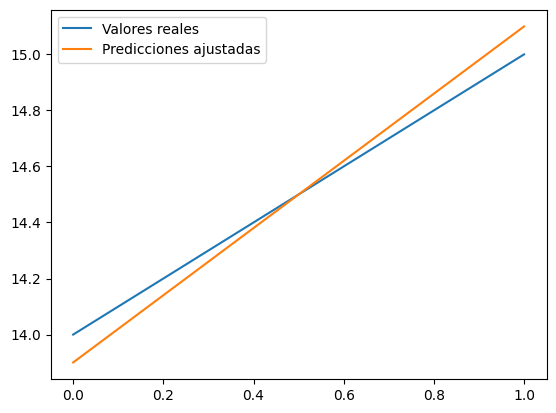

In [8]:
# Calcular las diferencias entre y_test y y_pred
differences = y_test - y_pred

# Calcular el promedio de las diferencias
mean_difference = differences.mean()
print("Promedio de las diferencias:", mean_difference)

# Restar el promedio de las diferencias a cada valor en y_pred
y_pred_adjusted = y_pred + mean_difference

# Graficar los valores reales y las predicciones ajustadas
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred_adjusted, label='Predicciones ajustadas')
plt.legend()
plt.show()

In [9]:
# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2437153399609997
MAE: 0.48353052139282227
R2: 0.025138640156001202


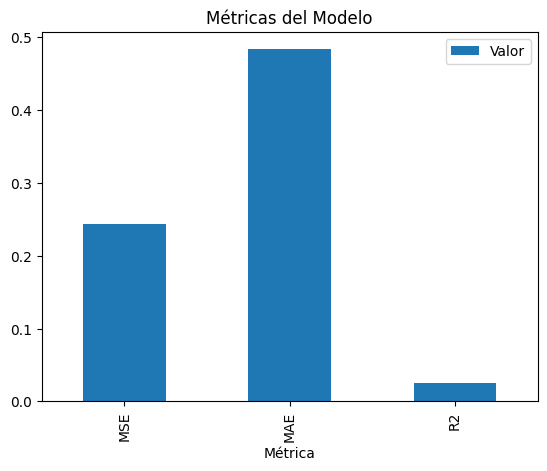

In [10]:
# Graficar métricas
metrics = {'MSE': mse, 'MAE': mae, 'R2': r2}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Métrica', 'Valor'])
metrics_df.plot(x='Métrica', y='Valor', kind='bar', title='Métricas del Modelo')
plt.show()

### Preguntas


1. ¿Qué biblioteca se utiliza para implementar la red neuronal LSTM en Python?
> Keras.

2. ¿Cuál es el propósito del paso 1 en el código?
> Preprocesar los datos de la serie temporal, lo cual implica limpiarlos y dividirlos en conjuntos de entrenamiento y prueba.

3. ¿Qué hace la función create_dataset en el paso 2?
> Transformar los datos de series temporales en conjuntos de secuencias.

4. ¿Qué significa el parámetro seq_length en la función create_dataset?
> Longitud de las secuencias.

5. ¿Por qué es necesario transformar los datos en secuencias en el paso 2?
> Porque LSTM trabaja con datos secuenciales.
